IMPORTING MODULES

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
import seaborn as sns
from sklearn.svm import SVC
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.patches as mpatches

print('Imported')

Imported


READING DATA

In [ ]:
data = pd.read_csv('/content/shuffled_dataset.csv', header = 0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(10323, 11)
['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Amount Received', 'Receiving Currency', 'Amount Paid', 'Payment Currency', 'Payment Format', 'Is Laundering']


TRAINING AND TESTING DATA SPLITS

In [ ]:
file_path = '/content/shuffled_dataset.csv'
df = pd.read_csv(file_path)
df = df.drop("Timestamp",axis='columns')

# Assuming your target variable is 'Is Laundering', and other features are used for prediction

target_column = 'Is Laundering'
columns_to_drop = ['timestamp']

def convert(a):

  From_Acc_int = int(a,16)

  From_Acc_str = str(From_Acc_int)
  return(From_Acc_str)



# Check if columns exist before dropping
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop([target_column] + columns_to_drop, axis=1)

X['Account'] = X['Account'].apply(convert)
X['Account.1'] = X['Account.1'].apply(convert)
print(X)
y = df[target_column]

# Label encode the target variable if needed
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode categorical variables if any
X = pd.get_dummies(X, columns=['Receiving Currency', 'Payment Currency', 'Payment Format'], drop_first=True)

X_col_list = X.columns.tolist()
print(X_col_list)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
# You can adjust the hyperparameters (e.g., n_estimators, max_depth) based on your dataset


       From Bank      Account  To Bank    Account.1  Amount Received  \
0          17321  34424576272     4259  34424576352          6693.21   
1              1  34362197200        1  34362197200             4.26   
2          15447  34513081472     2824  34381277696         10339.03   
3         318879  34474834448   318879  34474834448        150426.45   
4             20  34361612240       22  34361667568         13338.33   
...          ...          ...      ...          ...              ...   
10318     113685  34522225200   113685  34522225200            19.22   
10319      13327  34395113488    15085  34647177904          9719.50   
10320         70   4299327144    15863  34578389104            70.16   
10321     215266  34467626368   215266  34467626368             5.80   
10322       1292  34366143232   111764  34491666352         12285.54   

      Receiving Currency  Amount Paid Payment Currency Payment Format  
0                   Euro      6693.21             Euro         

RANDOM FOREST MODEL

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\n--Random Forest--")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



--Random Forest--

Confusion Matrix:
[[1040   53]
 [  37  935]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1093
           1       0.95      0.96      0.95       972

    accuracy                           0.96      2065
   macro avg       0.96      0.96      0.96      2065
weighted avg       0.96      0.96      0.96      2065



LOGISTIC REGRESSION MODEL

In [ ]:


# Initialize the logistic regression model
logistic_reg_model = LogisticRegression(random_state=42)

# Train the model
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg_model.predict(X_test)

# Evaluate the model
print('--Logistic regression model--')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--Logistic regression model--
Confusion Matrix:
[[850 243]
 [671 301]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.78      0.65      1093
           1       0.55      0.31      0.40       972

    accuracy                           0.56      2065
   macro avg       0.56      0.54      0.52      2065
weighted avg       0.56      0.56      0.53      2065



SVC MODEL

In [ ]:
SVC_model = SVC(C=1.0, kernel='rbf', random_state=42,probability = True)

# Train the model
SVC_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = SVC_model.predict(X_test)

# Evaluate the model
print('--Support Vector Classifier--')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--Support Vector Classifier--
Confusion Matrix:
[[1034   59]
 [ 865  107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.95      0.69      1093
           1       0.64      0.11      0.19       972

    accuracy                           0.55      2065
   macro avg       0.59      0.53      0.44      2065
weighted avg       0.59      0.55      0.45      2065



WORKING MODEL WITH OUTPUT

In [13]:
recv_curr_dict = {'Bitcoin':1, 'Brazil Real':2,
                  'Canadian Dollar':3, 'Euro':4,
                  'Mexican Peso':5, 'Ruble':6, 'Rupee':7,
                  'Saudi Riyal':8, 'Shekel':9, 'Swiss Franc':10,
                  'UK Pound':11, 'US Dollar':12, 'Yen':13,
                  'Yuan':14}
payment_method_dict = {"ACH":1,"Bitcoin":2,"Cash":3,"Cheque":4,"Credit Card":5,"Reinvestment":6}
#user input////////////////////////////
from_bank = input("Enter from bank IFSC: ")

Acc = input("Enter SENDER account number in HEXA: ")
From_Acc_int = int(Acc,16)
From_Acc_str = str(From_Acc_int)

TO_bank = input("Enter TO bank IFSC: ")

Acc_1 = input("Enter RECV account number in HEXA: ")
To_Acc_int = int(Acc_1,16)
To_Acc_str = str(To_Acc_int)

Amount_Received = input("Enter Amount Received: ")

recv_curr_inp = input("Enter Recv currency: ")
recv_iterator_dict = recv_curr_dict[recv_curr_inp]
recv_iterator_list = 4 + recv_iterator_dict

amt_paid = input("Enter amount paid: ")

paym_curr_inp = input("Enter Payment currency: ")
paym_iterator_dict = recv_curr_dict[paym_curr_inp]
paym_iterator_list = 19 + recv_iterator_dict



paym_meth_inp = input("Enter Payment method: ")
paym_meth_iterator_dict = payment_method_dict[paym_meth_inp]
paym_meth_iterator_list = 33 + paym_meth_iterator_dict

list1 = [from_bank,From_Acc_str ,TO_bank,To_Acc_str,Amount_Received,'','','','','','','','','','','','','','',amt_paid,'','','','','','','','','','','','','','','','','','','','']
for i in range(5,19):
  if(i == recv_iterator_list):
    list1[i] = '1'
  else:
    list1[i] = '0'



for i in range(20,34):
  if(i == paym_iterator_list):
    list1[i] = '1'
  else:
    list1[i] = '0'



for i in range(34,40):
  if(i == paym_meth_iterator_list):
    list1[i] = '1'
  else:
    list1[i] = '0'




data = [list1]
'''le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode categorical variables if any
X = pd.get_dummies(X, columns=['From Bank', 'Account', 'Account.1', 'Receiving Currency', 'Payment Currency', 'Payment Format'], drop_first=True)
'''
# Create the pandas DataFrame
#user_inp_df = pd.DataFrame(data,columns=['From Bank', 'Account','To Bank' ,'Account.1', 'Amount Received','Receiving Currency', 'Amount Paid','Payment Currency', 'Payment Format'])

# print dataframe.
pred = model.predict(data)
print(pred[0])

'''if(pred[0] == 0):
  print("Not laundered")
else:
  print("Laundered")'''
y_pred = model.predict(df)


Enter from bank IFSC17321
Enter SENDER account number in HEXA803DD5910
Enter TO bank IFSC4259
Enter RECV account number in HEXA803DD5960
Enter Amount Received6693.21
Enter Recv currencyEuro
Enter amount paid6693.21
Enter Payment currencyEuro
Enter Payment methodACH
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Is Laundering
- Payment Currency
- Payment Format
- Receiving Currency
Feature names seen at fit time, yet now missing:
- Payment Currency_Bitcoin
- Payment Currency_Brazil Real
- Payment Currency_Canadian Dollar
- Payment Currency_Euro
- Payment Currency_Mexican Peso
- ...


In [14]:
if(pred[0] == 0):
  print("Not laundered")
else:
  print("Laundered")

Laundered


AUC & ROC CURVE

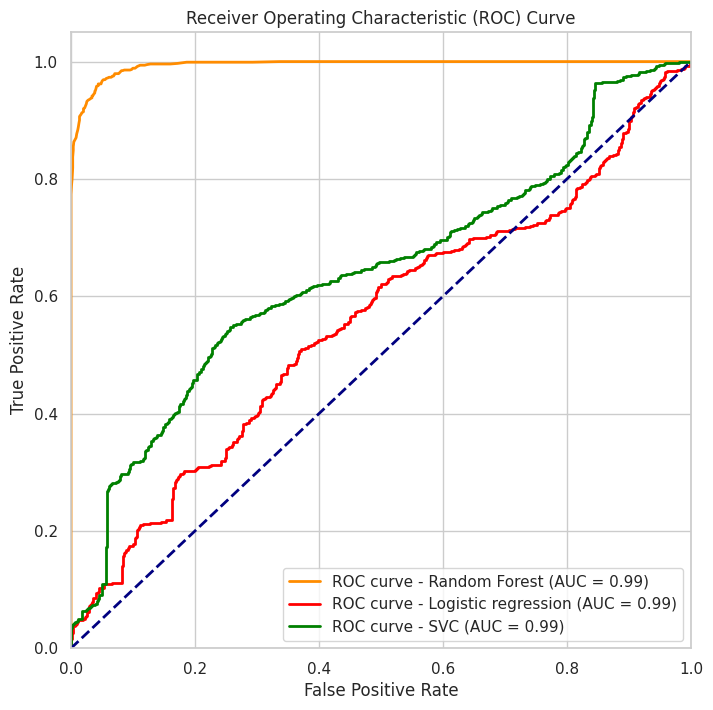

In [ ]:

y_probabilities = model.predict_proba(X_test)[:, 1]
log_y_probabilities = logistic_reg_model.predict_proba(X_test)[:, 1]
#


fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)


#Logistic Regression roc,auc

log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_y_probabilities)
log_roc_auc = auc(log_fpr, log_tpr)


#SVC MODEL ROC,AUC
SVC_y_probabilities = SVC_model.predict_proba(X_test)[:, 1]
SVC_fpr, SVC_tpr, SVC_thresholds = roc_curve(y_test, SVC_y_probabilities)
SVC_roc_auc = auc(SVC_fpr, SVC_tpr)


# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Random Forest (AUC = {:.2f})'.format(roc_auc))
plt.plot(log_fpr, log_tpr, color='red', lw=2, label='ROC curve - Logistic regression (AUC = {:.2f})'.format(roc_auc))
plt.plot(SVC_fpr, SVC_tpr, color='green', lw=2, label='ROC curve - SVC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

PIE CHART

Index(['US Dollar', 'Euro', 'Ruble', 'UK Pound', 'Rupee', 'Saudi Riyal',
       'Swiss Franc', 'Yuan', 'Yen', 'Canadian Dollar', 'Australian Dollar',
       'Shekel', 'Mexican Peso', 'Brazil Real', 'Bitcoin'],
      dtype='object')
['US Dollar (59.0%)', 'Euro (12.9%)', 'Ruble (6.5%)', 'UK Pound (4.1%)', 'Rupee (3.9%)', 'Saudi Riyal (3.6%)', 'Swiss Franc (1.9%)', 'Yuan (1.7%)', 'Yen (1.3%)', 'Canadian Dollar (1.2%)', 'Australian Dollar (1.2%)', 'Shekel (0.9%)', 'Mexican Peso (0.7%)', 'Brazil Real (0.6%)', 'Bitcoin (0.5%)']


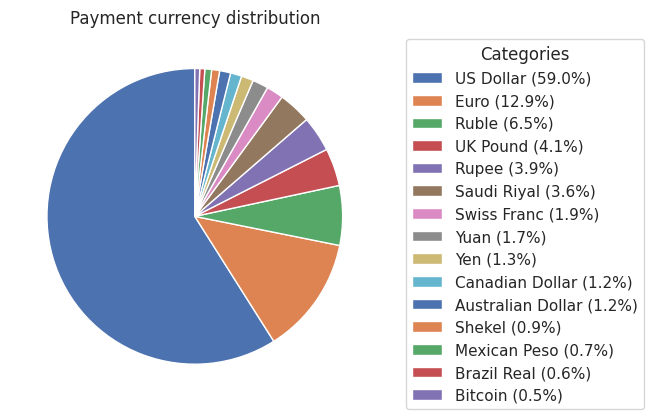

In [ ]:
category_counts = df['Receiving Currency'].value_counts()
print(category_counts.index)
# Plot a pie chart


wedges, texts, autotexts = plt.pie(category_counts, autopct='', startangle=90)

legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(category_counts.index, category_counts / category_counts.sum() * 100)]
print(legend_labels)
egend_handles = [mpatches.Patch(color=wedge.get_facecolor(), label=label) for wedge, label in zip(wedges, legend_labels)]

# Add a legend
plt.legend(wedges, legend_labels, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')


# Add a title
plt.title('Payment currency distribution')

# Show the plot
plt.show()